In [1]:
from tree_detection_framework.evaluation.evaluate import match_points, assess_matches
import geopandas as gpd
import matplotlib.pyplot as plt
import json

In [2]:
DATASET = "0047_000173_000175"

TREE_PRED = f"/ofo-share/species-prediction-project/intermediate/detected_trees/{DATASET}/tree_tops.gpkg"
TREE_GT = f"/ofo-share/species-prediction-project/intermediate/shifted_field_trees/{DATASET}.gpkg"
PLOT_BOUNDS = "/ofo-share/species-prediction-project/raw/ground-reference/ofo_ground-reference_plots.gpkg"
SHIFTS_FILE = "/ofo-share/species-prediction-project/intermediate/shifted_field_trees/shifts_per_dataset.json"

/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


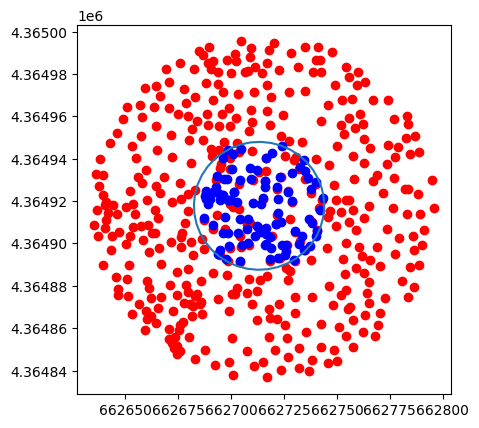

In [3]:
tree_preds = gpd.read_file(TREE_PRED)
tree_gt = gpd.read_file(TREE_GT)
plot_bounds = gpd.read_file(PLOT_BOUNDS)

shifts = json.load(open(SHIFTS_FILE, "r"))
# Get the particular shift for this dataset
shift = shifts[DATASET]
# Get the bounds for this dataset
plot = DATASET[:4]
plot_bound = plot_bounds.query("plot_id==@plot")

tree_gt.to_crs(tree_preds.crs, inplace=True)
plot_bound.to_crs(tree_preds.crs, inplace=True)
# The trees used in evaluation are shifted. So we need to shift the plot bounds the corresponding amount
plot_bound.geometry = plot_bound.translate(xoff=shift[0], yoff=shift[1])

f, ax = plt.subplots(1,1)
tree_preds.plot(ax=ax, c="r")
tree_gt.plot(ax=ax, c="b")
plot_bound.boundary.plot(ax=ax)
plt.show()

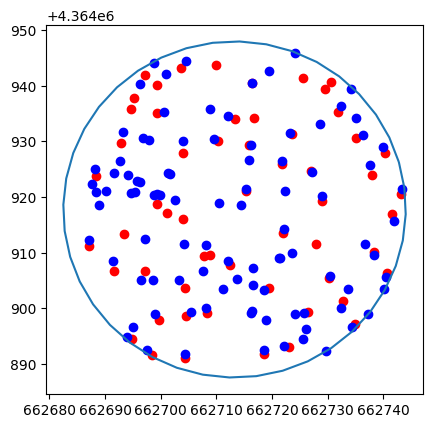

In [4]:
tree_preds = tree_preds.clip(plot_bound)
f, ax = plt.subplots(1,1)
tree_preds.plot(ax=ax, c="r")
tree_gt.plot(ax=ax, c="b")
plot_bound.boundary.plot(ax=ax)
plt.show()

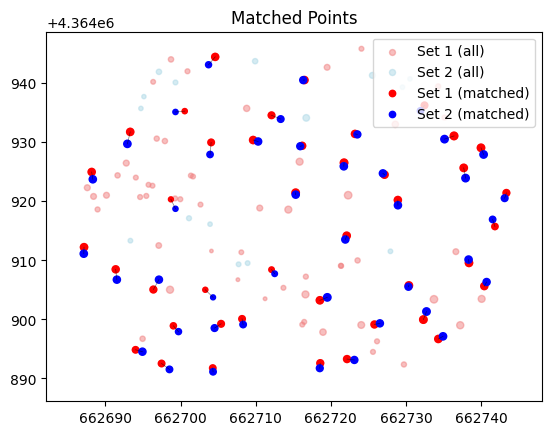

precision 0.7368421052631579, recall 0.4329896907216495, f1 0.5454545454545454


In [5]:
matches = match_points(treetop_set_1=tree_gt, treetop_set_2=tree_preds, height_column_1="height", height_column_2="height", vis=True)

precision, recall, f1 = assess_matches(matches=matches, n_ground_truth=len(tree_gt), n_predictions=len(tree_preds))
print(f"precision {precision}, recall {recall}, f1 {f1}")